# **Exercise 05: clustering models**

Import necessary *Python* packages:

In [1]:
import sys

import matplotlib.pyplot as plt

Add path to own modules:

In [2]:
sys.path.append("../../src", )

Import necessary entities:

In [3]:
from seaborn import scatterplot
from warnings import filterwarnings
from pandas import DataFrame, read_csv
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import (
    DBSCAN,
    KMeans,
    AgglomerativeClustering,
)

Import own necessary entities:

In [4]:
from plot_utils import draw_clustering_model_parameter_optimization

Ignore all warnings:

In [5]:
filterwarnings("ignore", )

Create a dictionary for `read_csv()` method calling:

In [6]:
read_csv_params: dict[str, str] = {
    "file": "regression.csv",
    "file_path": "../../data/datasets/",
}

Read the file `regression.csv` to a *Pandas* dataframe:

In [7]:
df: DataFrame = read_csv(
    read_csv_params["file_path"] + read_csv_params["file"],
)

Check `df` *Pandas* dataframe:

In [8]:
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667


## Remove the `pageviews` *Pandas* dataframe column:

In [9]:
df.drop(columns=["pageviews"], inplace=True, )

Check `df` *Pandas* dataframe:

In [10]:
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


Prepare features variable `X`:

In [11]:
X: DataFrame = df.drop(columns=["uid"], )

Check `X` variable:

In [12]:
X.head()

,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667


Create a model of *K means*:

In [13]:
k_means_model: KMeans = KMeans(random_state=21, n_clusters=3, )

## Use *K means* model to create a clusters:

In [14]:
k_means_model.fit(X, );

## Visualize *K means* model clusters:

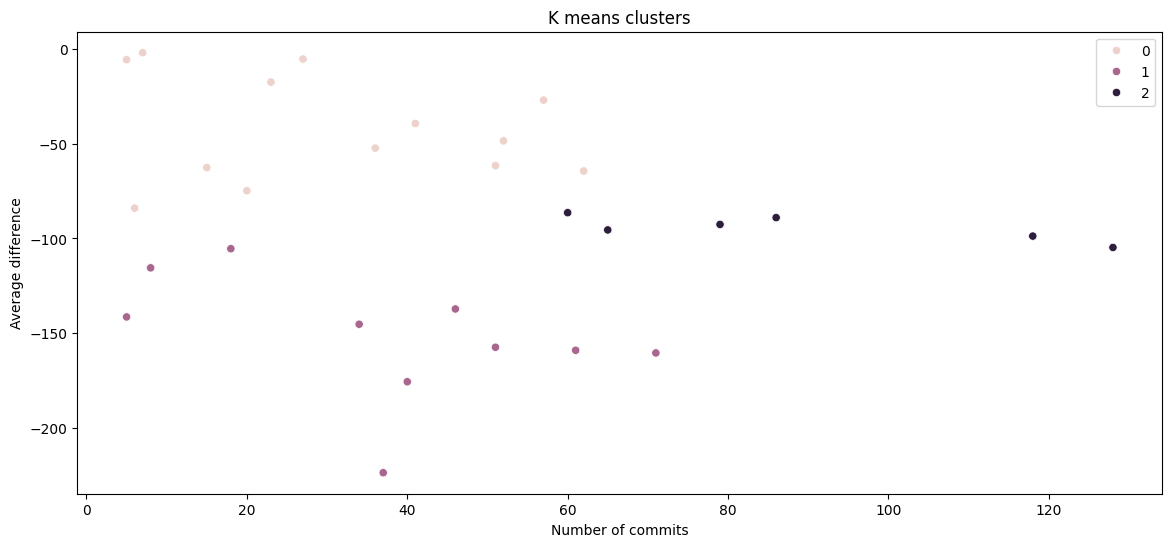

In [15]:
plt.figure(figsize=(14, 6, ), )
scatterplot(
    data=df,
    x="num_commits",
    y="AVG(diff)",
    hue=k_means_model.labels_,
)
plt.title("K means clusters", )
plt.xlabel("Number of commits", )
plt.ylabel("Average difference", )
plt.show()

## Try differents *K means* model values of `n_clusters` parameter:

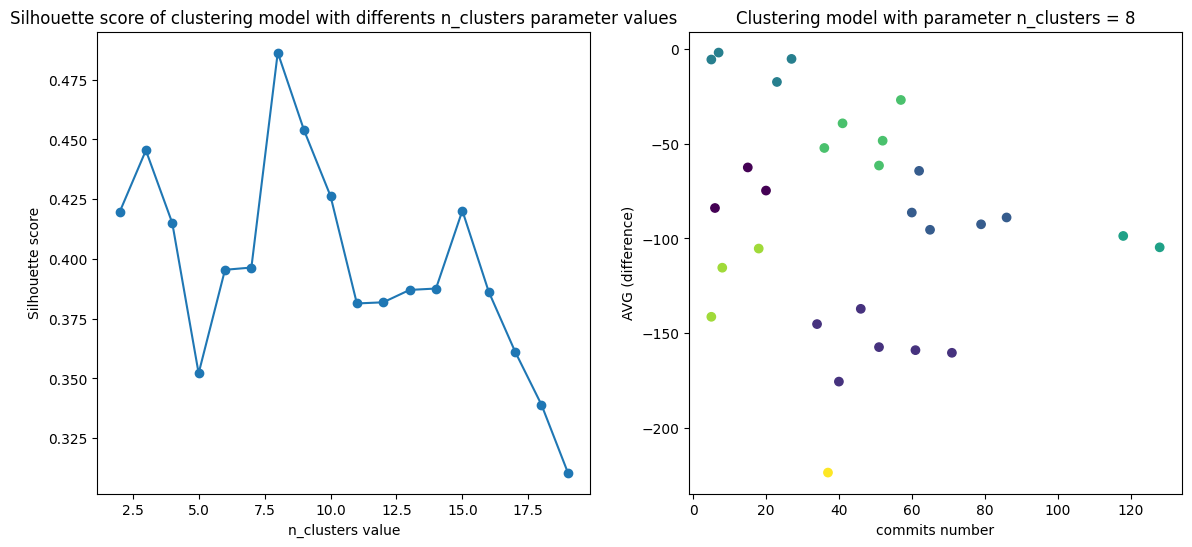

In [16]:
draw_clustering_model_parameter_optimization(
    X=X,
    opt_param="n_clusters",
    param_range=range(2, 20, ),
    clusterer_model=KMeans,
    model_params={"random_state": 21, },
)

## Calculate *K means* model silhouette score:

In [17]:
print(
    "The K means model silhouette is:",
    round(
        silhouette_score(
            X,
            k_means_model.fit_predict(X, ),
        ),
        3,
    ),
)

The K means model silhouette is: 0.445


Create a model of *DBScan*:

In [18]:
dbscan_model: DBSCAN = DBSCAN(eps=20, min_samples=2, )

## Use *DBScan* model to create a clusters:

In [19]:
dbscan_model.fit(X, );

## Visualize *DBScan* model clusters:

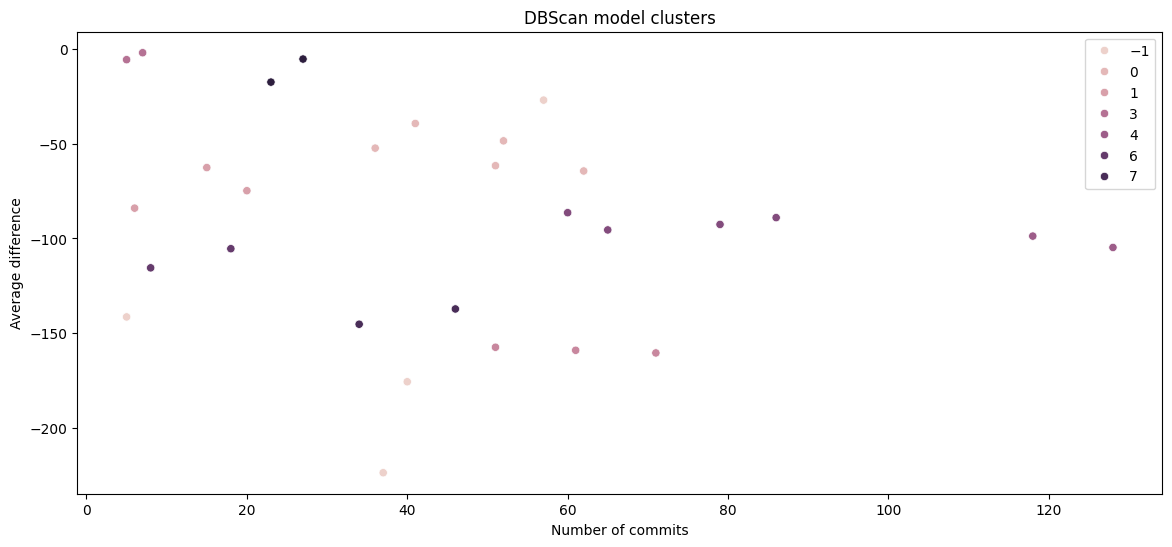

In [20]:
plt.figure(figsize=(14, 6, ), )
scatterplot(
    data=df,
    x="num_commits",
    y="AVG(diff)",
    hue=dbscan_model.labels_,
)
plt.title("DBScan model clusters", )
plt.xlabel("Number of commits", )
plt.ylabel("Average difference", )
plt.show()

## Try differents *DBScan* model values of `n_clusters` parameter:

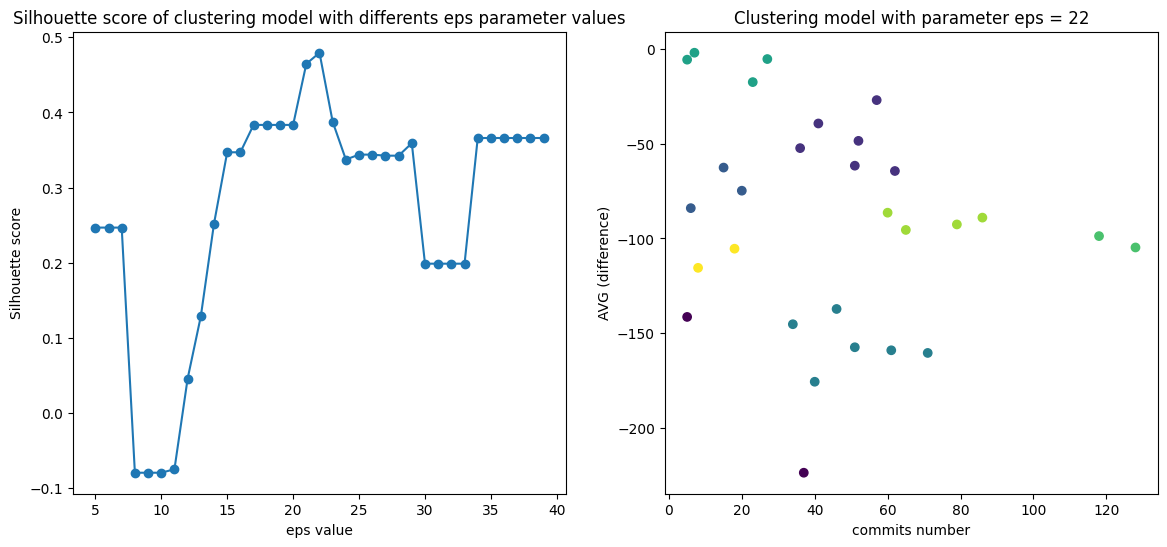

In [21]:
draw_clustering_model_parameter_optimization(
    X=X,
    opt_param="eps",
    param_range=range(5, 40, ),
    clusterer_model=DBSCAN,
    model_params={"min_samples": 2, },
)

## Calculate *DBScan* model silhouette score:

In [22]:
print(
    "The DBScan model silhouette is:",
    round(
        silhouette_score(
            X,
            dbscan_model.fit_predict(X, ),
        ),
        3,
    ),
)

The DBScan model silhouette is: 0.383


Create a model of *agglomerative clustering*:

In [23]:
agg_clusterer_model: AgglomerativeClustering = AgglomerativeClustering(
    n_clusters=5,
)

## Use *agglomerative clustering* model to create a clusters:

In [24]:
agg_clusterer_model.fit(X, );

## Visualize *agglomerative clustering* model clusters:

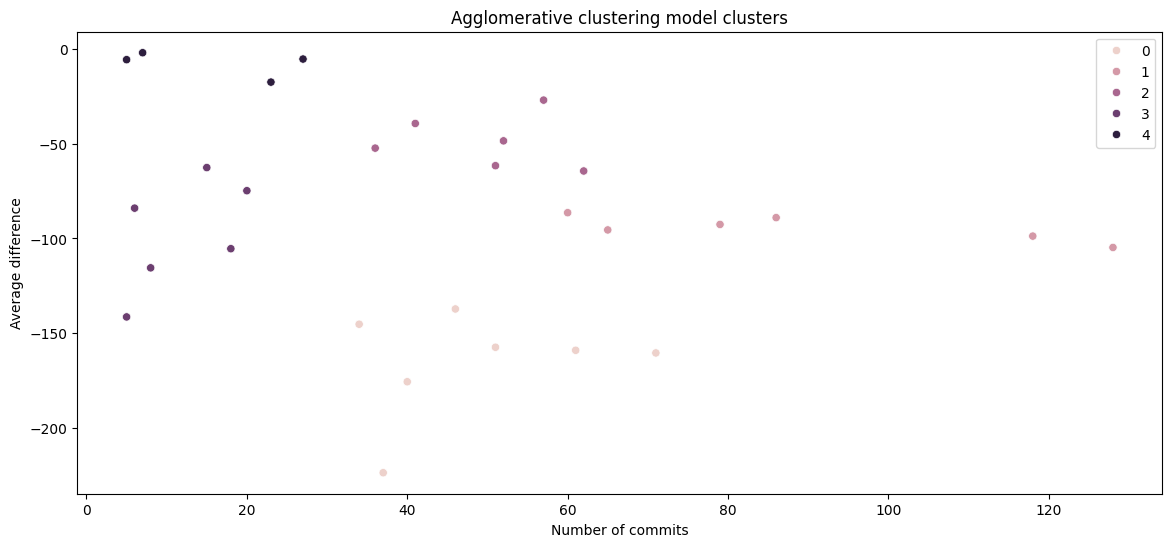

In [25]:
plt.figure(figsize=(14, 6, ), )
scatterplot(
    data=df,
    x="num_commits",
    y="AVG(diff)",
    hue=agg_clusterer_model.labels_,
)
plt.title("Agglomerative clustering model clusters", )
plt.xlabel("Number of commits", )
plt.ylabel("Average difference", )
plt.show()

## Try differents *agglomerative clustering* model values of `n_clusters` parameter:

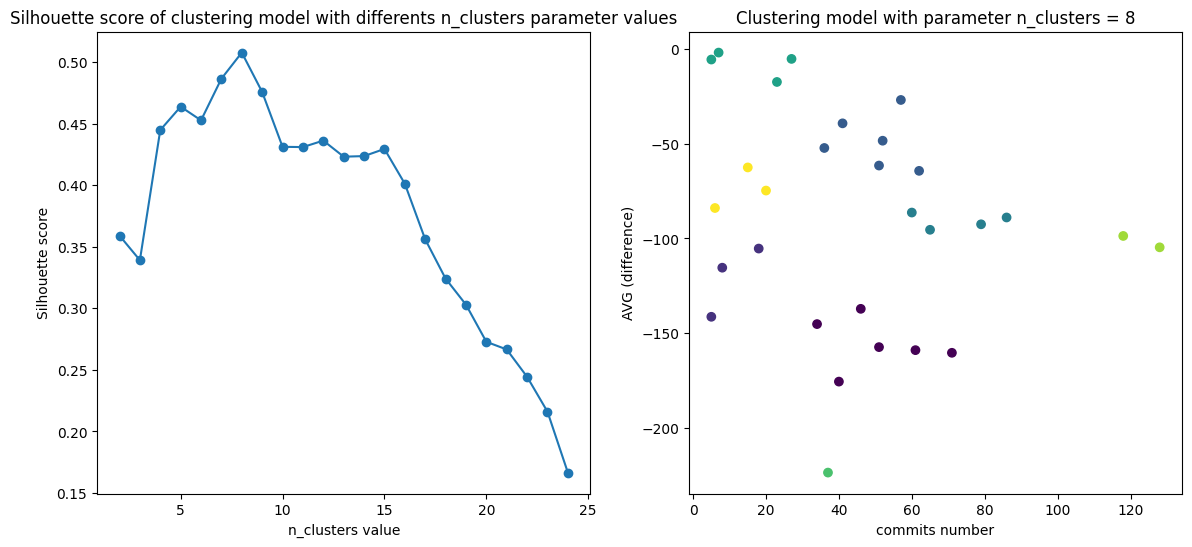

In [26]:
draw_clustering_model_parameter_optimization(
    X=X,
    opt_param="n_clusters",
    param_range=range(2, 25, ),
    clusterer_model=AgglomerativeClustering,
    model_params={},
)

## Calculate *agglomerative clustering* model silhouette score:

In [27]:
print(
    "The agglomerative clustering model silhouette is:",
    round(
        silhouette_score(
            X,
            agg_clusterer_model.fit_predict(X, ),
        ),
        3,
    ),
)

The agglomerative clustering model silhouette is: 0.464


## Visualize the dendrogram of *agglomerative clustering* model:

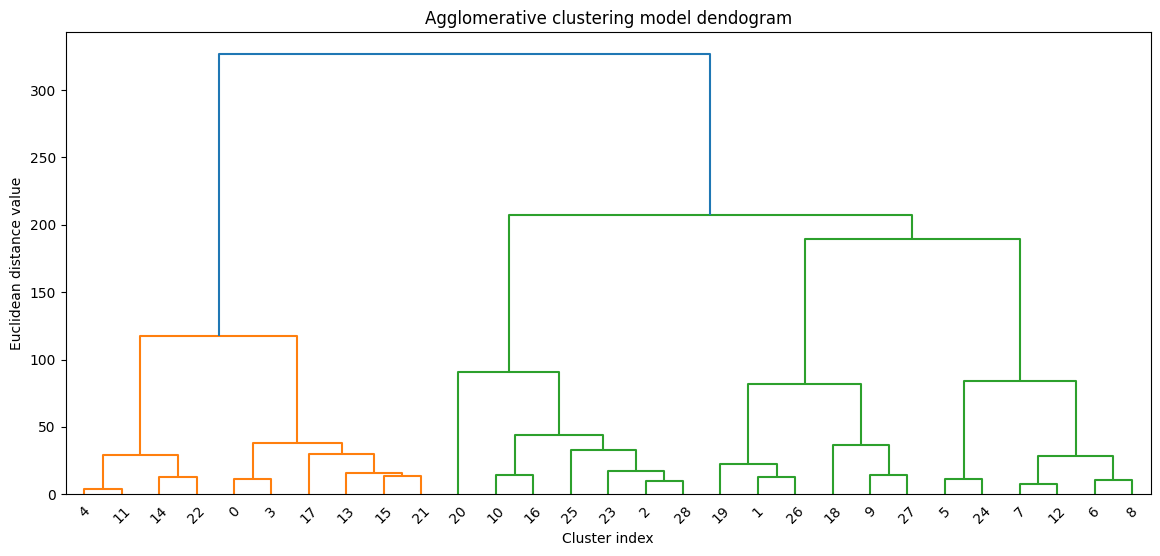

In [28]:
plt.figure(figsize=(14, 6, ), )
dendrogram(
    linkage(
        X,
        method="ward",
    ),
)
plt.title("Agglomerative clustering model dendogram", )
plt.xlabel("Cluster index", )
plt.ylabel("Euclidean distance value", )
plt.show()